# 7장

In [1]:
import numpy as np
import pandas as pd

In [2]:
import pandas as pd

df = pd.read_csv('mn.csv')

df_cut = df[:100]

df_cut = df_cut.drop('Unnamed: 0', axis = 1)

df_cut.to_csv('mn_cut100.csv')

df_cut


C:\Users\ygeun\AppData\Local\Temp\ipykernel_13040\1674623036.py:3: DtypeWarning: Columns (110,111,112,120) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('mn.csv')


,HH1,HH2,LN,MWM1,MWM2,MWM4,MWM5,MWM6D,MWM6M,MWM6Y,...,MCSURV,MCDEAD,mwelevel,mnweight,wscore,windex5,wscoreu,windex5u,wscorer,windex5r
0,1,17,1,1,17,1,14,7,4,2014,...,0.0,0.0,Higher,0.403797,1.603670,5,1.272552,5.0,NaN,NaN
1,1,20,1,1,20,1,14,7,4,2014,...,0.0,0.0,Higher,0.403797,1.543277,5,1.089026,5.0,NaN,NaN
2,2,1,1,2,1,1,9,8,4,2014,...,3.0,0.0,Primary,1.031926,0.878635,4,-0.930721,1.0,NaN,NaN
3,2,1,5,2,1,5,9,12,4,2014,...,NaN,NaN,NaN,0.000000,0.000000,0,0.000000,0.0,0.0,0.0
4,2,1,8,2,1,8,9,8,4,2014,...,0.0,0.0,Secondary,1.031926,0.878635,4,-0.930721,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,7,17,2,7,17,2,13,6,4,2014,...,0.0,0.0,Higher,0.989303,1.722785,5,1.634524,5.0,NaN,NaN
96,7,18,1,7,18,1,7,4,4,2014,...,1.0,0.0,Secondary,0.989303,0.671458,4,-1.560301,1.0,NaN,NaN
97,7,20,2,7,20,2,7,6,4,2014,...,0.0,0.0,Higher,0.989303,1.639897,5,1.382641,5.0,NaN,NaN
98,7,20,3,7,20,3,7,6,4,2014,...,0.0,0.0,Secondary,0.989303,1.639897,5,1.382641,5.0,NaN,NaN


In [3]:
import csv

data_rdr = csv.reader(open('mn_cut100.csv', 'rt'))
header_rdr = csv.reader(open('mn_headers.csv', 'rt', encoding = 'utf-8'))

data_rows = [d for d in data_rdr] # 159개
header_rows = [h for h in header_rdr] #210개

In [4]:
# 불량 헤더목록 만들기
bad_rows = []
for h in header_rows:
    if h[0] not in data_rows[0]:
        bad_rows.append(h) # 60개

In [5]:
for h in bad_rows:
    header_rows.remove(h)
# header_rows: 210개 --> 150개

In [6]:
# 정리된 헤더 목록에 없는 데이터 헤더 목록 찾기
all_short_headers = [h[0] for h in header_rows]

for header in data_rows[0]:
    if header not in all_short_headers:
        print('mismatch', header)

mismatch 
mismatch MDV1F
mismatch MTA8E
mismatch mwelevel
mismatch mnweight
mismatch wscoreu
mismatch windex5u
mismatch wscorer
mismatch windex5r


In [7]:
data_rdr = csv.reader(open('mn_cut100.csv', 'rt'))
header_rdr = csv.reader(open('mn_headers_updated.csv', 'rt', encoding = 'utf-8'))

data_rows = [d for d in data_rdr] # 159개
header_rows = [h for h in header_rdr if h[0] in data_rows[0]] # 152개

In [8]:
# mistmach 7개 데이터 index 추출 후 삭제
skip_index = []
all_short_headers = [h[0] for h in header_rows]

for header in data_rows[0]:
    if header not in all_short_headers:
        index = data_rows[0].index(header)
        skip_index.append(index)

new_data = []
for row in data_rows:
    new_row = []
    for i, d in enumerate(row):
        if i not in skip_index:
            new_row.append(d)
    new_data.append(new_row) # 152개

In [9]:
# 데이터에 mistmatch 7개를 삭제한 data_headers 만들기
data_headers = []
for i, header in enumerate(data_rows[0]):
    if i not in skip_index:
        data_headers.append(header)
len(data_headers)

152

In [10]:
# 어긋나는 위치 확인
for i, header in enumerate(data_headers):
    if header not in all_short_headers[i]:
        print(header, all_short_headers[i])

MMC1 MTA1
MMC2 MTA2
MMC3 MTA3
MMC4 MTA4
MTA1 MTA5
MTA2 MTA6
MTA3 MTA7
MTA4 MTA8A
MTA5 MTA8B
MTA6 MTA8C
MTA7 MTA8D
MTA8A MTA8E
MTA8B MTA8X
MTA8C MTA9
MTA8D MTA10
MTA8E MTA11
MTA8X MTA12A
MTA9 MTA12B
MTA10 MTA12C
MTA11 MTA12X
MTA12A MTA13
MTA12B MTA14
MTA12C MTA15
MTA12X MTA16
MTA13 MTA17
MTA14 HH6
MTA15 HH7
MTA16 MWDOI
MTA17 MWDOB
TNLN MWAGE
TN4 MWDOM
TN5 MWAGEM
TN6 MWDOBLC
TN8 MMSTATUS
TN9 MCEB
TN10 MCSURV
TN11 MCDEAD
TN12_1 MMC1
TN12_2 MMC2
TN12_3 MMC3
TN12_4 MMC4
HH6 TNLN
HH7 TN4
MWDOI TN5
MWDOB TN6
MWAGE TN8
MWDOM TN9
MWAGEM TN10
MWDOBLC TN11
MMSTATUS TN12_1
MCEB TN12_2
MCSURV TN12_3
MCDEAD TN12_4


In [11]:
# 어긋나는 위치 확인
for i, header in enumerate(data_headers):
    if header not in all_short_headers[i]:
        print(header, all_short_headers[i])
        
# 어긋나는 부분 재배열
skip_index = []
final_header_rows = []
all_short_headers = [h[0] for h in header_rows]

for header in data_rows[0]:
    if header not in all_short_headers:
        index = data_rows[0].index(header)
        skip_index.append(index)
    else:
        for head in header_rows:
            if head[0] == header:
                final_header_rows.append(head)
                break
skip_index

MMC1 MTA1
MMC2 MTA2
MMC3 MTA3
MMC4 MTA4
MTA1 MTA5
MTA2 MTA6
MTA3 MTA7
MTA4 MTA8A
MTA5 MTA8B
MTA6 MTA8C
MTA7 MTA8D
MTA8A MTA8E
MTA8B MTA8X
MTA8C MTA9
MTA8D MTA10
MTA8E MTA11
MTA8X MTA12A
MTA9 MTA12B
MTA10 MTA12C
MTA11 MTA12X
MTA12A MTA13
MTA12B MTA14
MTA12C MTA15
MTA12X MTA16
MTA13 MTA17
MTA14 HH6
MTA15 HH7
MTA16 MWDOI
MTA17 MWDOB
TNLN MWAGE
TN4 MWDOM
TN5 MWAGEM
TN6 MWDOBLC
TN8 MMSTATUS
TN9 MCEB
TN10 MCSURV
TN11 MCDEAD
TN12_1 MMC1
TN12_2 MMC2
TN12_3 MMC3
TN12_4 MMC4
HH6 TNLN
HH7 TN4
MWDOI TN5
MWDOB TN6
MWAGE TN8
MWDOM TN9
MWAGEM TN10
MWDOBLC TN11
MMSTATUS TN12_1
MCEB TN12_2
MCSURV TN12_3
MCDEAD TN12_4


[0, 151, 152, 155, 156, 157, 158]

In [12]:
# 헤더 설명 list 만들기
header1 = []
for row in final_header_rows:
    header1.append(row[1])

In [13]:
# 데이터에 헤더설명 추가
new_data.insert(1, header1)

In [14]:
# list --> dataframe csv 저장 (pandas 또는 csv 사용)

df = pd.DataFrame(new_data)
df.to_csv('mn_clean02.csv', index = False)

import csv
with open('mn_clean02.csv', 'w', newline='', encoding = 'utf8') as f:
    writer = csv.writer(f)
    writer.writerow(new_data)

# 8장

In [15]:
import seaborn as sns
df = sns.load_dataset("titanic")

In [16]:
# 요약 정보 df.info()

In [17]:
# 누락데이터 개수 구하기
df.isnull().sum(axis = 0)
nan_deck = df['deck'].value_counts(dropna=False)
nan_deck

deck
NaN    688
C       59
B       47
D       33
E       32
A       15
F       13
G        4
Name: count, dtype: int64

In [18]:
# 유효데이터가 500개 미만이면 삭제
df_thresh = df.dropna(axis=1, thresh = 500)
df_thresh.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

In [19]:
# age 열에 나이 데이터가 없는 모든 행 삭제
# default how = 'any' # nan값 하나라도 있으면 삭제
# default axis = 0
df_age = df.dropna(subset=['age'], how = 'any')

In [20]:
# 평균값으로 대체
mean_age = df['age'].mean()
df['age'].fillna(mean_age, inplace = True)

In [21]:
# 앞 값으로 대체
df['age'].fillna(method = 'ffill', inplace = True)

C:\Users\ygeun\AppData\Local\Temp\ipykernel_13040\3047073473.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['age'].fillna(method = 'ffill', inplace = True)


# 9장

In [22]:
sr = pd.Series([1.2, 1.5, 2.4, 2.8, np.nan, 3.5, 4.1, 9.0])

delta = 2
bottom = sr.mean() - delta * sr.std()
top = sr.mean() + sr.std()

print('outlier:')

for val in sr:
    if val < bottom:
        print(val)
    elif val > top:
        print(val)

outlier:
9.0


In [23]:
df = pd.DataFrame({'c1': ['a', 'a', 'b', 'a', 'b'],
                  'c2': [1, 1, 1, 2, 2],
                  'c3': [1, 1, 2, 2, 2]})
df

,c1,c2,c3
0,a,1,1
1,a,1,1
2,b,1,2
3,a,2,2
4,b,2,2


In [24]:
# 중복 여부 판단하는 boolean Series를 반환
# keep = "first": 처음 거는 지킴 / keep = False: 처음 것도 True로 반환
df_dup = df.duplicated()
df_dup

0    False
1     True
2    False
3    False
4    False
dtype: bool

In [25]:
# c2, c3 컬럼에 한해 겹칠 경우, 행 삭제
df2 = df.drop_duplicates(subset = ['c2', 'c3'])
df2

,c1,c2,c3
0,a,1,1
2,b,1,2
3,a,2,2


In [26]:
from fuzzywuzzy import fuzz
my_records = [{'favorite_book': 'Grapes of Wrath', 'favorite_movie': 'Free Willie',},
              {'favorite_book': 'The Grapes of Wrath','favorite_movie': 'Free Willy',}]
print(fuzz.ratio(my_records[0].get('favorite_book'), my_records[1].get('favorite_book')))

88


C:\Users\ygeun\anaconda3\anaconda\Lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [27]:
from fuzzywuzzy import process
choices = ['Yes', 'No', 'Maybe', 'N/A']
process.extract('ya', choices, limit = 2)

[('Yes', 45), ('Maybe', 45)]

# 11장

In [28]:
# HTML 웹페이제에서 표 속성 가져오기

In [29]:
url = 'sample.html'
tables = pd.read_html(url)

In [30]:
# HTML 웹페이지에서 텍스트 가져오

In [31]:
import requests
from bs4 import BeautifulSoup

# request 라이브러리로 url 소스코드 수집
url = 'http://www.yes24.com/24/Category/BestSeller'
response = requests.request("GET", url)

# BeautifulSoup로 HTML 구문분석 트리 생성
data = BeautifulSoup(response.text, 'html.parser')

In [32]:
#find(): 가장 먼저 등장하는 해당 태그 값을 가져옴
#find_all(): 해당 태그를 가진 모든 값을 리스트(list) 형식으로 가져옴

cards_data = data.find_all('div', attrs = {'class':'itemUnit'})

print('Total Number of Cards Found : ', len(cards_data))

Total Number of Cards Found :  24


In [33]:
for card in cards_data:
    print(card.find('a', attrs = {'class': 'gd_name'}).text)
    tag = card.find('span', attrs = {'class': 'authPub info_auth'})
    print(tag.find('a').text)
    print(card.find('em', attrs = {'class': 'yes_b'}).text)

리틀 라이프 1
한야 야나기하라
13,320
선재 업고 튀어 대본집 세트
이시은
45,000
리틀 라이프 2
한야 야나기하라
13,320
하루 한 장 나의 어휘력을 위한 필사 노트
유선경
21,420
불변의 법칙
모건 하우절
22,500
나를 소모하지 않는 현명한 태도에 관하여
마티아스 뇔케
16,020
나는 다정한 관찰자가 되기로 했다
이은경
16,020
세이노의 가르침
세이노(SayNo)
6,480
신화의 숲
김헌
16,200
마흔에 읽는 쇼펜하우어
강용수
15,300
흔한남매 과학 탐험대 10 생태계
흔한남매
13,320
국어 잘하는 아이가 이깁니다
나민애
15,750
부자의 마지막 가르침
다우치 마나부
17,820
THE MONEY BOOK 더 머니북
토스
19,800
원피스 ONE PIECE 108
오다 에이이치로
4,950
꽃길이 따로 있나, 내 삶이 꽃인 것을
오평선
15,120
빨모쌤의 라이브 영어회화
신용하
19,800
돈의 심리학 (30만 부 기념 스페셜 에디션) 
모건 하우절
17,820
나는 메트로폴리탄 미술관의 경비원입니다
패트릭 브링리
15,750
나의 돈키호테
김호연
16,200
ETS 토익 정기시험 기출문제집 1000 Vol. 4 RC
ETS
17,820
설민석의 한국사 대모험 29
설민석
11,700
환영합니다 성령님
손기철
22,500
내 몸 혁명
박용우
17,550


In [34]:
# 딕셔너리로 리스트 만들기

scraped_data = []

for card in cards_data:
    card_details = {}
    card_details['book_name'] =card.find('a', attrs = {'class': 'gd_name'}).text
    tag = card.find('span', attrs = {'class': 'authPub info_auth'})
    card_details['author'] = tag.find('a').text
    card_details['price'] = card.find('em', attrs = {'class': 'yes_b'}).text

    scraped_data.append(card_details)

In [35]:
df = pd.DataFrame.from_dict(scraped_data)
df

,book_name,author,price
0,리틀 라이프 1,한야 야나기하라,"13,320"
1,선재 업고 튀어 대본집 세트,이시은,"45,000"
2,리틀 라이프 2,한야 야나기하라,"13,320"
3,하루 한 장 나의 어휘력을 위한 필사 노트,유선경,"21,420"
4,불변의 법칙,모건 하우절,"22,500"
5,나를 소모하지 않는 현명한 태도에 관하여,마티아스 뇔케,"16,020"
6,나는 다정한 관찰자가 되기로 했다,이은경,"16,020"
7,세이노의 가르침,세이노(SayNo),"6,480"
8,신화의 숲,김헌,"16,200"
9,마흔에 읽는 쇼펜하우어,강용수,"15,300"


In [36]:
images = []

for card in cards_data:
    images.append(card.find('img'))

image_src = [x['data-original'] for x in images]

image_count = 1

for image in image_src:
    with open('img/image_' + str(image_count) + '.jpeg', 'wb') as f: # 영상, 이미지 등은 b 해줘야 함
        res = requests.get(image)
        f.write(res.content)

    image_count = image_count + 1

# 12장

In [37]:
# 표준화

In [38]:
df = pd.read_csv('housingsample.csv')
df

,Price,Sq Feet,Age
0,90300,1700,14
1,150500,1518,27
2,269500,2708,22
3,98000,830,15
4,244650,2550,28


In [39]:
price_mean = df['Price'].mean()
price_std = df['Price'].std()

for i in range(df.shape[1]):
    col = df.iloc[:, i]
    col = (col - col.mean()) / col.std()
    df.iloc[:, i] = col

In [40]:
housing = pd.read_csv('housingsample.csv')
housing

,Price,Sq Feet,Age
0,90300,1700,14
1,150500,1518,27
2,269500,2708,22
3,98000,830,15
4,244650,2550,28


In [41]:
from sklearn import preprocessing
standardized = preprocessing.scale(housing)

pd.DataFrame(standardized, columns = ['Price', 'Sq.feet', 'Age'])

,Price,Sq.feet,Age
0,-1.084852,-0.232737,-1.231895
1,-0.271449,-0.495505,0.992360
2,1.336439,1.222592,0.136877
3,-0.980812,-1.488824,-1.060798
4,1.000674,0.994475,1.163456


In [42]:
# 정규화

In [43]:
for i in range(df.shape[1]):
    col = df.iloc[:, i]
    col = (col - col.min()) /(col.max() - col.min())
    df.iloc[:, i] = col

In [44]:
normalized = preprocessing.MinMaxScaler().fit_transform(housing)
pd.DataFrame(normalized, columns = ['Price', 'Sq.feet', 'Age'])

,Price,Sq.feet,Age
0,0.000000,0.463259,0.000000
1,0.335938,0.366347,0.928571
2,1.000000,1.000000,0.571429
3,0.042969,0.000000,0.071429
4,0.861328,0.915868,1.000000


In [45]:
# 정규성 검정

In [46]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


C:\Users\ygeun\anaconda3\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ygeun\AppData\Local\Temp\ipykernel_13040\3052561270.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic['age'].dropna())
C:\Users\ygeun\anaconda3\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.opti

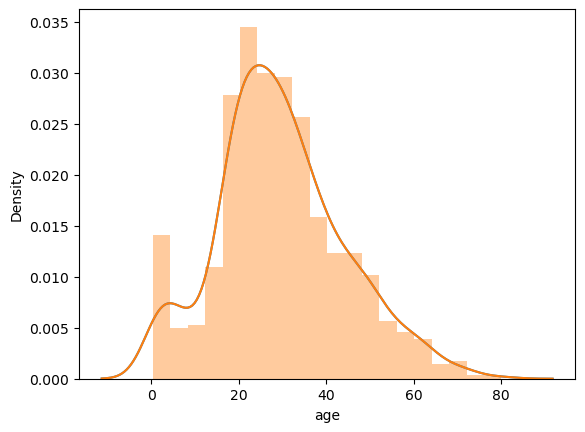

In [47]:
import matplotlib.pyplot as plt
import scipy.stats as stats

sns.kdeplot(titanic['age'].dropna())
sns.distplot(titanic['age'].dropna())
# stats.probplot(titanic['age'].dropna(),  plot = plt)
plt.show()

In [48]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [49]:
iris = iris.drop(['species'], axis = 1)

corr = iris.corr().round(2)

# 13장

In [50]:
import pandas as pd

df = pd.read_csv('./auto-mpg.csv', header=None)
df.columns =  ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'name']
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [51]:
import numpy as np
df['horsepower'].replace('?', np.nan, inplace=True)

df.dropna(subset=['horsepower'], inplace=True)

df['horsepower'] = df['horsepower'].astype('float')

print(df['horsepower'].dtypes)

float64


In [52]:
count, bin_dividers = np.histogram(df['horsepower'], bins=3)

print(count, bin_dividers)

[257 103  32] [ 46.         107.33333333 168.66666667 230.        ]


In [53]:
# optin: include_lowest = True 동작 확인
bin_names = ['저출력', '보통출력', '고출력']

df['hp_bin'] = pd.cut(
    x=df['horsepower'],
    bins=bin_dividers,
    labels=bin_names
)

for idx, col in enumerate(df['horsepower']):
    if col==46:
        print(df.iloc[idx])


mpg                                     26.0
cylinders                                  4
displacement                            97.0
horsepower                              46.0
weight                                  1835
acceleration                            20.5
model_year                                70
origin                                     2
name            volkswagen 1131 deluxe sedan
hp_bin                                   NaN
Name: 19, dtype: object
mpg                                26.0
cylinders                             4
displacement                       97.0
horsepower                         46.0
weight                             1950
acceleration                       21.0
model_year                           73
origin                                2
name            volkswagen super beetle
hp_bin                              NaN
Name: 102, dtype: object


In [54]:
def label_encoding(data):
    if data == '저출력':
        return 0
    elif data == '보통출력':
        return 1
    else:
        return 2


df['hp_le'] = df['hp_bin'].apply(label_encoding)
df[['horsepower', 'hp_bin', 'hp_le']].head(15)

,horsepower,hp_bin,hp_le
0,130.0,보통출력,1
1,165.0,보통출력,1
2,150.0,보통출력,1
3,150.0,보통출력,1
4,140.0,보통출력,1
5,198.0,고출력,2
6,220.0,고출력,2
7,215.0,고출력,2
8,225.0,고출력,2
9,190.0,고출력,2


In [55]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['hp_le'] = le.fit_transform(df['hp_bin'])
df[['horsepower', 'hp_bin', 'hp_le']].head(15)

,horsepower,hp_bin,hp_le
0,130.0,보통출력,1
1,165.0,보통출력,1
2,150.0,보통출력,1
3,150.0,보통출력,1
4,140.0,보통출력,1
5,198.0,고출력,0
6,220.0,고출력,0
7,215.0,고출력,0
8,225.0,고출력,0
9,190.0,고출력,0


In [56]:
df['origin'].replace({1: 'USA', 2: 'EU', 3: 'JPN'}, inplace=True)
origin_dummies = pd.get_dummies(df['origin'])
origin_dummies.tail(15)

,EU,JPN,USA
383,False,True,False
384,False,True,False
385,False,True,False
386,False,False,True
387,False,False,True
388,False,False,True
389,False,False,True
390,False,True,False
391,False,False,True
392,False,False,True
